# Normalización de los datos

Al entrenar una red, una de las técnicas que optimizan el entrenamiento es la normalización las entradas

Supongamos que tenemos un sistema que depende de $x$ e $y$ y es de la siguiente manera

In [1]:
import numpy as np

N = 100
x = np.random.rand(N)*1
y = np.random.rand(N)*100
z = 2*x + 2*y

Si representamos la distribución de los datos vemos que no es igual en $x$ e $y$

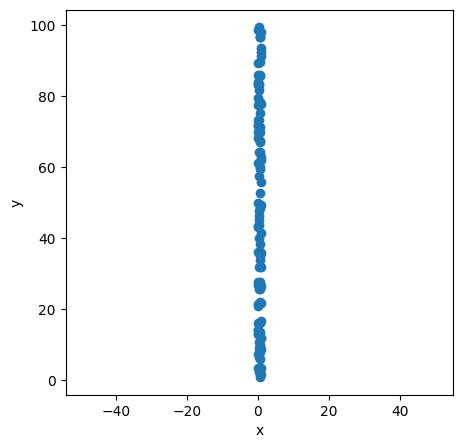

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

Vamos a representar ahora cómo sería el error en función de los posibles valores de los pesos de una neurona

In [3]:
def model(x, y, w1, w2):
    return w1*x + w2*y

def loss(x, y, z, w1, w2):
    return ((z-model(x, y, w1, w2))**2).mean()

Text(0.5, 0, 'loss')

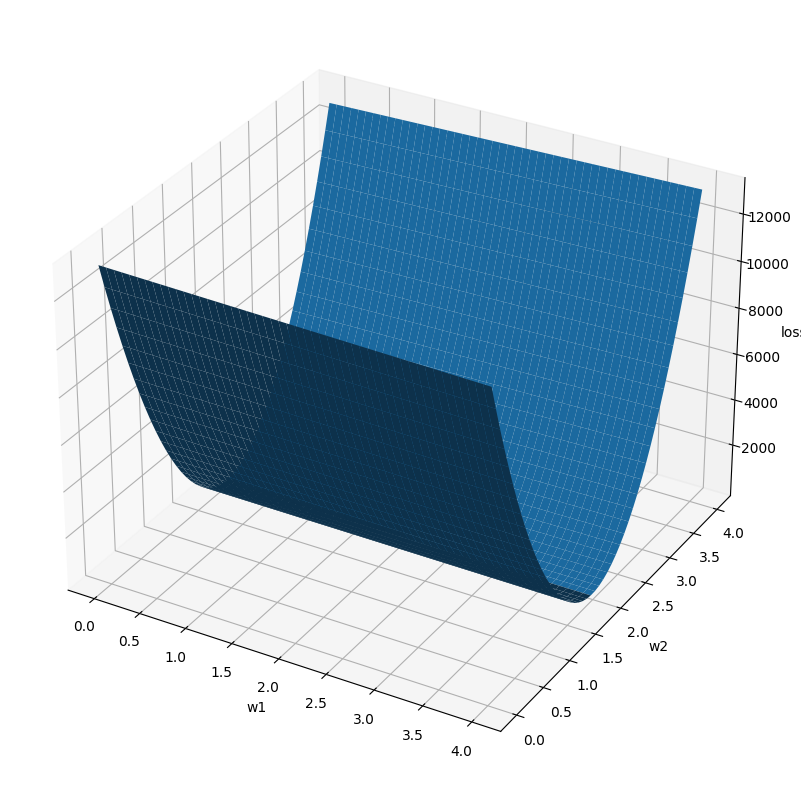

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Se crea la figura
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Se crean los datos para representar\n",
N = 50
w1_min = 0
w1_max = 4
w2_min = 0
w2_max = 4
posibles_w1 = np.linspace(w1_min, w1_max, N)
posibles_w2 = np.linspace(w2_min, w2_max, N)
W1, W2 = np.meshgrid(posibles_w1, posibles_w2)
def LOSS(x, y, z, W1, W2):
    L = np.empty((len(W1), len(W1)))
    Z = np.empty((len(W1), len(W2), len(x)))

    for i in range(len(W1)):
        for j in range(len(W2)):
            L[i, j] = loss(x, y, z, W1[i, j], W2[i, j])
    return L
Z = LOSS(x, y, z, W1, W2)

# Se termina de configurar la figura
ax.plot_surface(W1, W2, Z)
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('loss')

Como se puede ver la pérdida varía mucho más cuando se varía $\omega_2$ que cuando se varía $\omega_1$.
Esto puede hacer al entrenamiento peor, ya que al calcular los gradientes, va a ser mayor el gradiente de $\omega_2$ que el de $\omega_1$, por lo tanto al variar los parámetros se va a modificar mucho más $\omega_2$ que $\omega_1$. Es decir, durante el entrenamiento, el valor de $\omega_2$ seguramente esté oscilando mucho mientras que el de $\omega_1$ no

Para solucionar esto lo que se suele hacer es normalizar los datos de entrada, calculando su media y su desviación estandar

In [5]:
x_mean = np.mean(x)
y_mean = np.mean(y)
x_std = np.std(x)
y_std = np.std(y)

print(f"x_mean: {x_mean:.2f}, y_mean: {y_mean:.2f}, x_std: {x_std:.2f}, y_std: {y_std:.2f}")

x_mean: 0.50, y_mean: 48.68, x_std: 0.31, y_std: 29.91


Una vez se tienen la media y la desviación estandar, se normalizan los datos de la siguiente manera

In [6]:
x_norm = (x - x_mean)/x_std
y_norm = (y - y_mean)/y_std
z_norm = 2*x_norm + 2*y_norm

Si representamos ahora la distribución de puntos vemos que los dos tienen una distribución similar

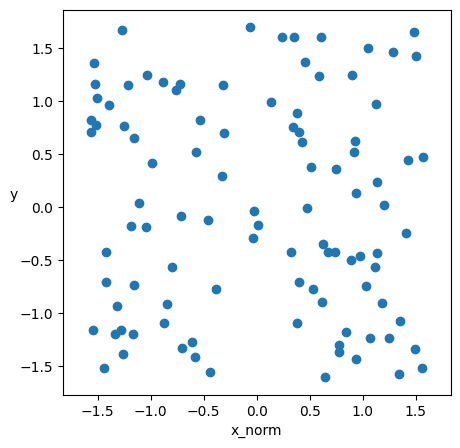

In [7]:
fig = plt.figure(figsize=(5,5))
plt.scatter(x_norm, y_norm)
plt.xlabel('x_norm')
plt.ylabel('y', rotation=0)
plt.axis('equal')
plt.show()

Y si representamos la función de pérdida en función de $\omega_2$ y $\omega_1$

Text(0.5, 0, 'loss')

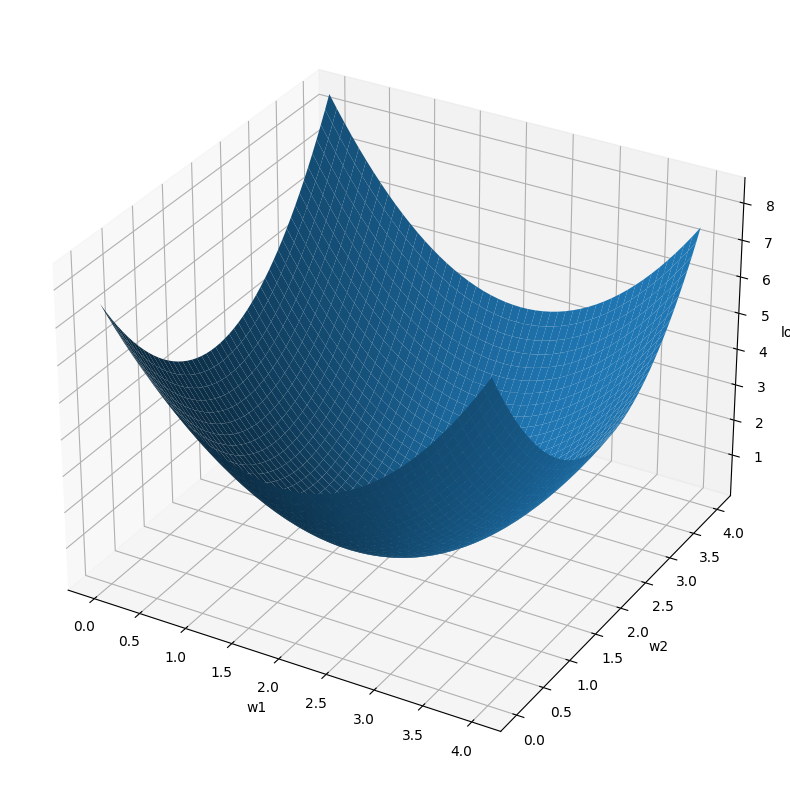

In [8]:
# Se crea la figura
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Se crean los datos para representar\n",
N = 50
w1_min = 0
w1_max = 4
w2_min = 0
w2_max = 4
posibles_w1 = np.linspace(w1_min, w1_max, N)
posibles_w2 = np.linspace(w2_min, w2_max, N)
W1, W2 = np.meshgrid(posibles_w1, posibles_w2)
def LOSS(x, y, z, W1, W2):
    L = np.empty((len(W1), len(W1)))
    Z = np.empty((len(W1), len(W2), len(x)))

    for i in range(len(W1)):
        for j in range(len(W2)):
            L[i, j] = loss(x, y, z, W1[i, j], W2[i, j])
    return L
Z = LOSS(x_norm, y_norm, z_norm, W1, W2)

# Se termina de configurar la figura
ax.plot_surface(W1, W2, Z)
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('loss')

Vemos ahora que la función de pérdida es similar para $\omega_2$ y $\omega_1$, por lo que el entrenamiento será similar para los dos parámetros